<a href="https://colab.research.google.com/github/RobertSloan22/AppliedDataScience/blob/main/Capstone_Facial_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial Emotion Detection**
ROBERT A, SLOAN

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


PROBLEM STATEMENT:

CONTEXT: Computer Vision has use cases across almost all domains, from self-driving and evaluating the driver's experience in more automated and self-driving vehicles to the customer service industry across many types of jobs. The objective here is to build a range of different CNNs and test them to see what architecture works best for the problem of taking in an image and being able to recognize that A) there is a person in the image, but then also determine the emotional state of the person in the image.

Key Questions:

CNNs: Are they the right type of model for this task?

If CNNs are the right type of model, how are they constructed, and what kind of depth to the convolution layers is necessary and useful?

What is the best level of accuracy and overall performance that we can achieve before the model starts to become overfitted?

Transfer learning: How much can be gained by using pretrained models that are open-sourced? These models have been trained at no small expense on a large amount of labeled data that's time-intensive to collect and label. To reproduce them would be outside of what we are currently able to afford for the task, so can we gain from the hard work done by others, and if so, to what level?

We are trying to take in pixels from an image, value the pixel intensity, and then construct a neural network that can learn to see the world in terms of pixel values but be able to recognize the emergent features beyond that of just the pixel value. To see the human face and identify that one face has ears, and where there are ears, there is probably a face when looking at other images. Building on that to recognize the mouth and the facial features that change during different emotional states.

Hopefully, the task of teaching a computer to recognize emotions will actually help us become better at recognizing people's emotions and interacting properly with them.



In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Feb 16 23:45:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [3]:
!pip install tensorflowjs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 72.9 MB/s eta 0:00:00


In [ ]:
# prompt: convert this saved model (/content/digit.h5) into tensorflowjs json format

!tensorflowjs_converter --input_format=keras /content/emotion_model.h5 /content/emotion_model_js


2024-02-14 02:42:56.382141: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 02:42:56.382188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 02:42:56.383512: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 02:42:56.390792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 02:42:57.348918: W tensorflow/comp

In [ ]:
# prompt: convert this saved model (/content/digit.h5) into tensorflowjs json format

!tensorflowjs_converter --input_format=keras /content/earlystopping_model.h5 /content/earlystopping_model_js


2024-02-14 03:13:26.574718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 03:13:26.574759: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 03:13:26.575944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 03:13:27.509757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# prompt: convert this saved model (/content/digit.h5) into tensorflowjs json format

!tensorflowjs_converter --input_format=keras /content/digit.h5 /content/digit_model


2024-02-14 03:16:50.607395: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-14 03:16:50.607439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-14 03:16:50.608551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-14 03:16:51.606711: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# prompt: install and import the tensorflowjs converter tool and necessary libs

!pip install tensorflowjs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [4]:
!pip install tensorflowjs


In [5]:
tfjs.converters.save_keras_model(model, tfjs_target_dir)

NameError: name 'tfjs' is not defined

In [ ]:
!tensorflowjs_converter --input_format=keras /content/drive/My Drive/cnn_model_2.h5 /content/drive/My Drive/

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [6]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
# Library for creating data paths
import os

# Library for randomly selecting data points
import random

# Library for performing numerical computations
import numpy as np

# Library for creating and showing plots
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
# Importing Deep Learning Libraries
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adamax, AdamW
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam



In [5]:
!pip install scikit-learn

### **Let us load and unzip the data**

In [6]:
path = '/content/drive/My Drive/Deep learning/CapstoneProject/Facial_emotion_images.zip'

with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [7]:
picture_size = 48
folder_path = "Facial_emotion_images/"

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

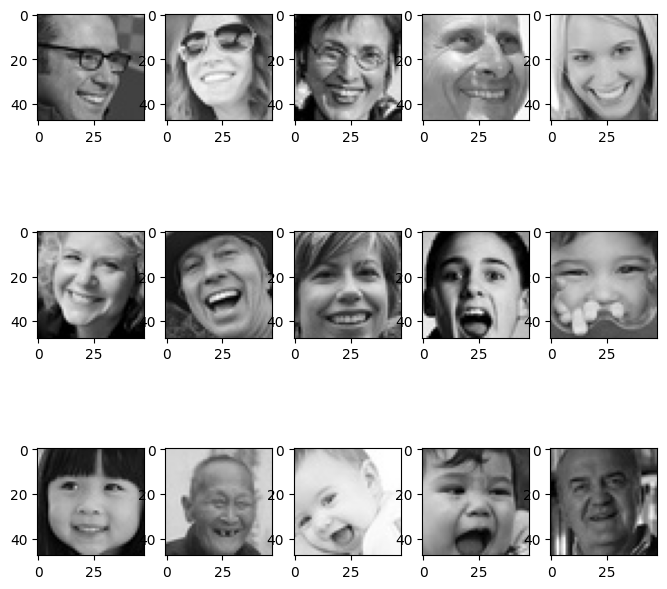

In [14]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 16, 1):
    plt.subplot(3, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Sad**

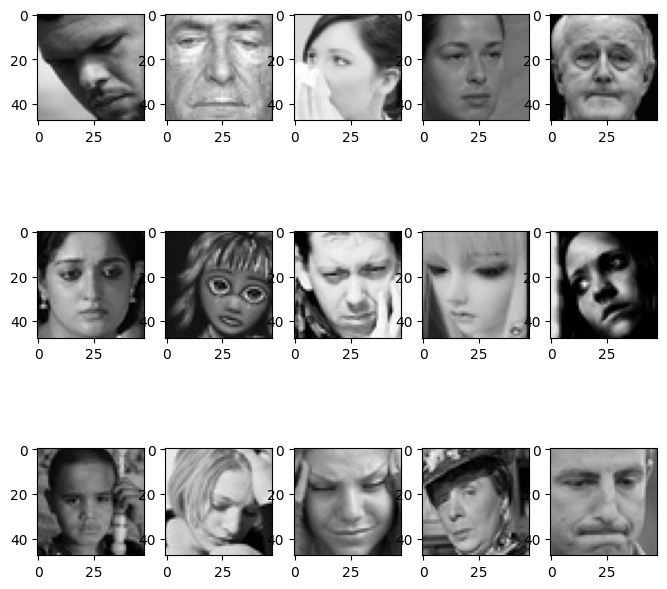

In [12]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 16, 1):
    plt.subplot(3, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Neutral**

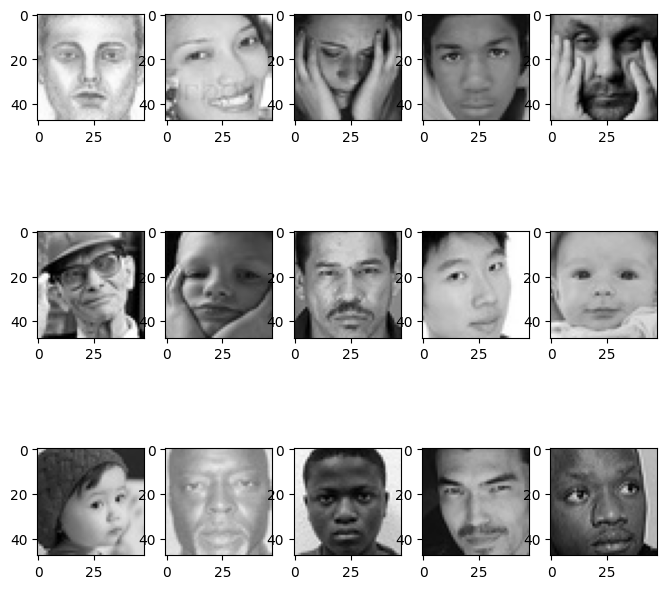

In [11]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 16, 1):
    plt.subplot(3, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

### **Surprised**

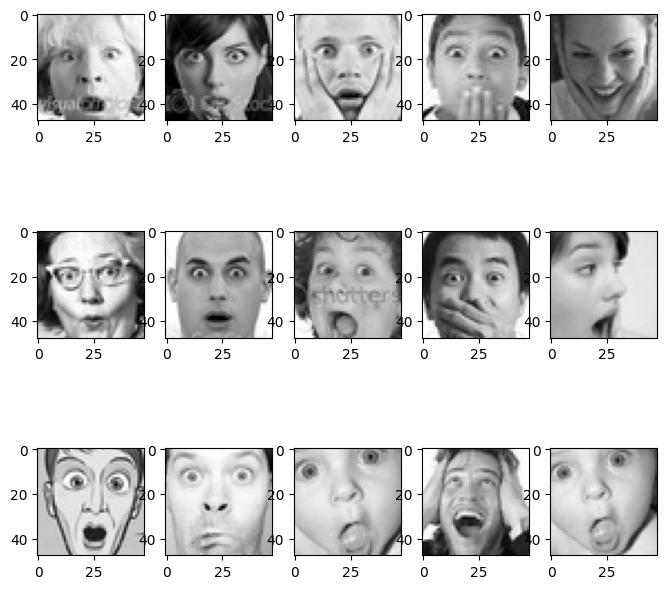

In [10]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 16, 1):
    plt.subplot(3, 5, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)

plt.show()

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [ ]:
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))
print(f"Number of training images for class 'sad' is: {num_sad}")


Number of training images for class 'sad' is: 3982


In [ ]:
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))
print(f"Number of training images for class is 'neutral': {num_neutral}")

Number of training images for class is 'neutral': 3978


In [ ]:
num_surprise = len(os.listdir(folder_path + "train/" + 'surprise'))
print(f"Number of training images for class is 'surprise': {num_surprise}")
num_happy = len(os.listdir(folder_path + "train/" + 'happy'))
print(f"Number of training images for class is 'happy': {num_happy}")
num_neutral = len(os.listdir(folder_path + "train/" + 'neutral'))
print(f"Number of training images for class is 'neutral': {num_neutral}")
num_sad = len(os.listdir(folder_path + "train/" + 'sad'))
print(f"Number of training images for class 'sad' is: {num_sad}")


Number of training images for class is 'surprise': 3173
Number of training images for class is 'happy': 3976
Number of training images for class is 'neutral': 3978
Number of training images for class 'sad' is: 3982


In [ ]:
num_happy = len(os.listdir(folder_path + "train/" + 'happy'))
print(f"Number of training images for class is 'happy': {num_happy}")

Number of training images for class is 'happy': 3976


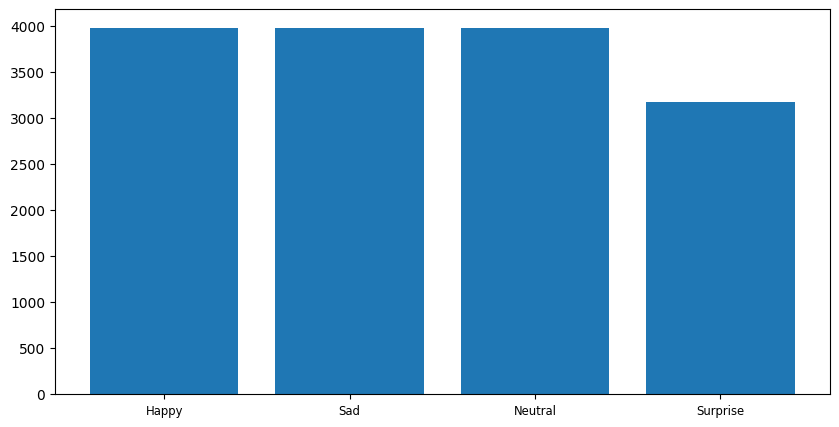

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

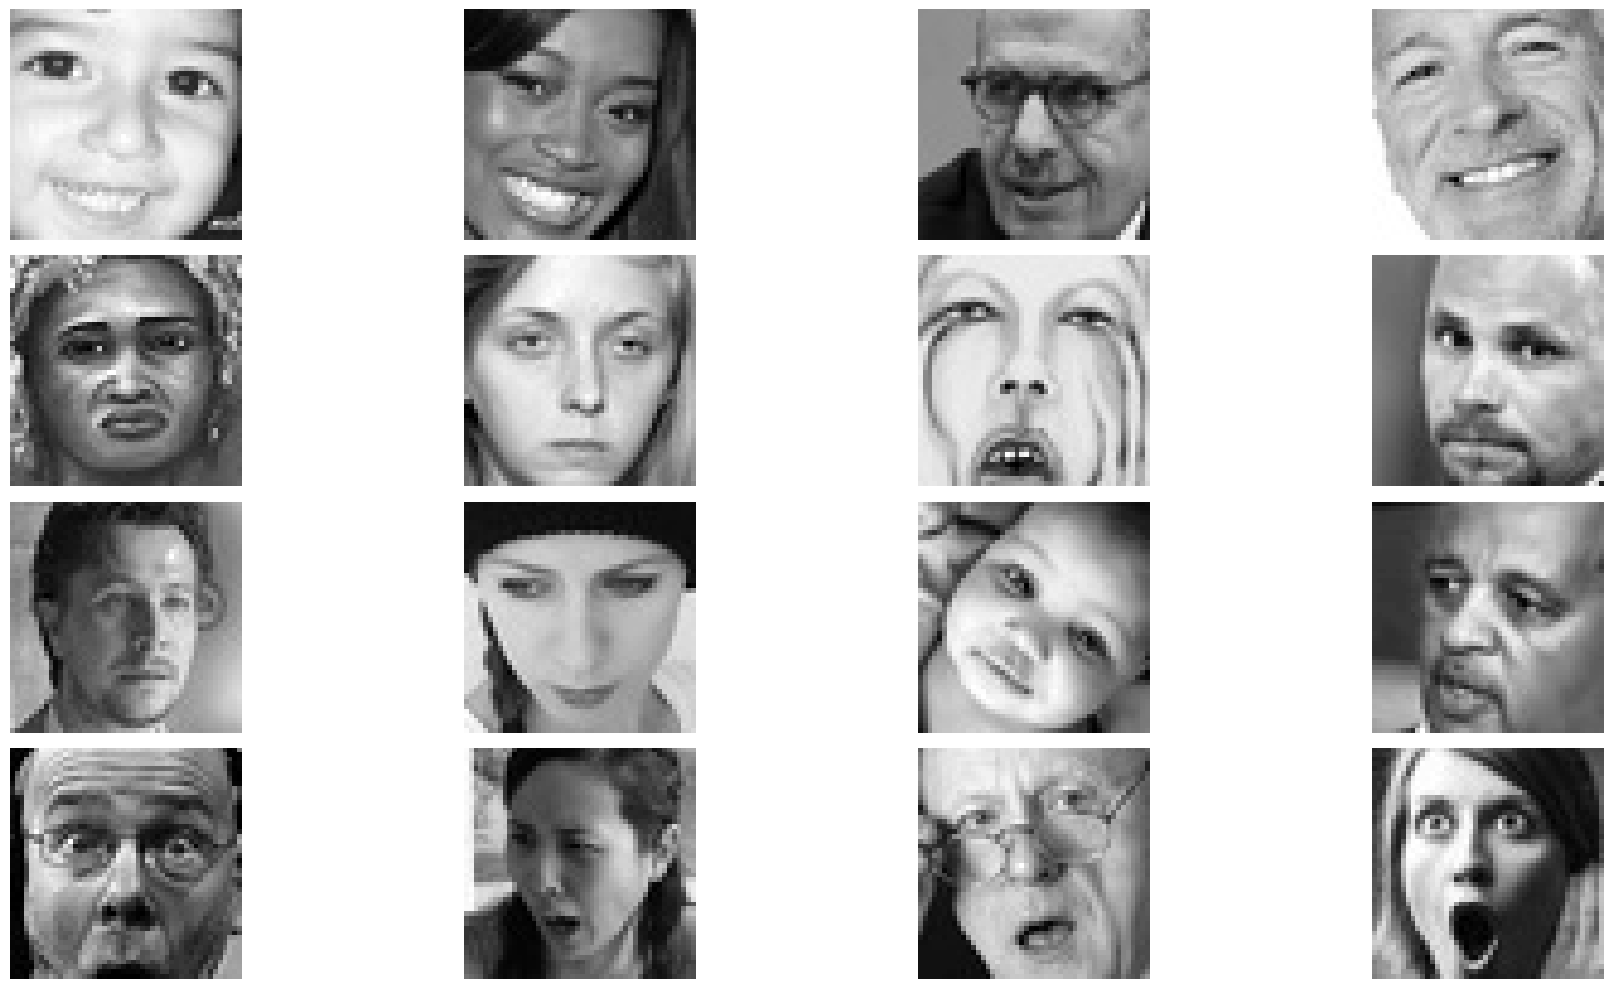

In [ ]:
base_dir = 'Facial_emotion_images/train/'
categories = ['happy', 'sad', 'neutral', 'surprise']

fig, ax = plt.subplots(nrows=len(categories), ncols=4, figsize=(20, 10))
for i, category in enumerate(categories):
    category_dir = os.path.join(base_dir, category)
    sample_images = os.listdir(category_dir)[:4]  # Get first 4 images of each category
    for j, image in enumerate(sample_images):
        img_path = os.path.join(category_dir, image)
        img = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].axis('off')
    ax[i, 0].set_ylabel(category)

plt.tight_layout()
plt.show()


**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

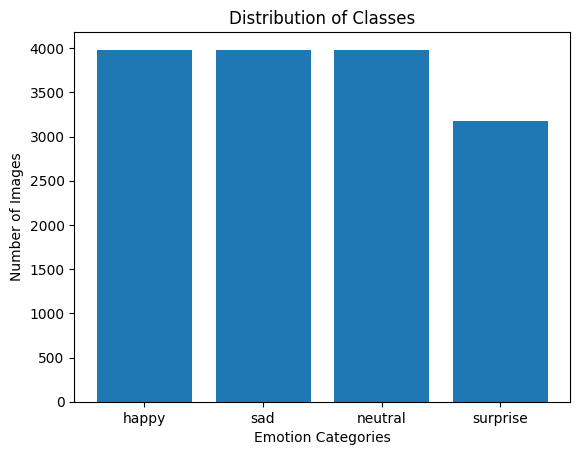

In [ ]:
import matplotlib.pyplot as plt
import os

base_dir = 'Facial_emotion_images/train/'
categories = ['happy', 'sad', 'neutral', 'surprise']

# Calculating the number of images in each category
category_counts = {category: len(os.listdir(os.path.join(base_dir, category))) for category in categories}

# Plotting the distribution of classes
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes')
plt.show()


OBSERVATION: The categorys sad neutral and happy all have the same ammount of images however the suprise category has less.


**Observations and Insights:__**

The data set is skewed and needs to have some data augmentation methods applied to equalize the data set.

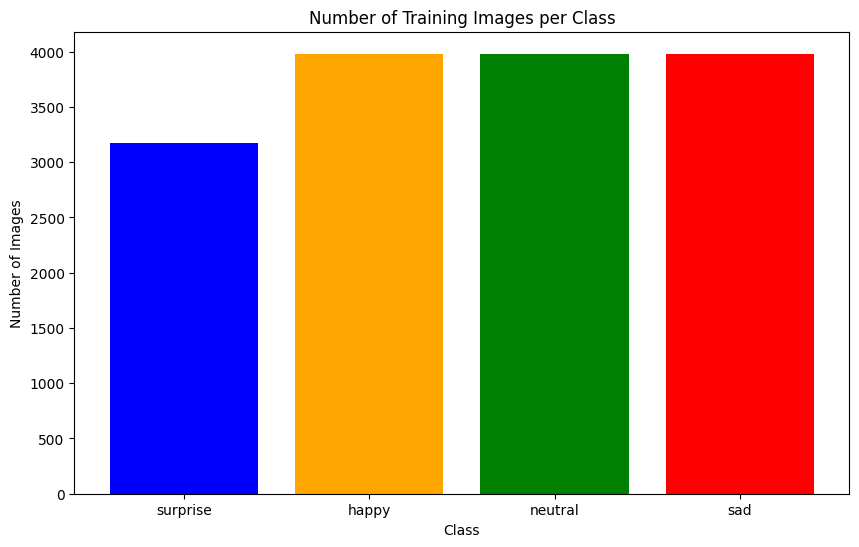

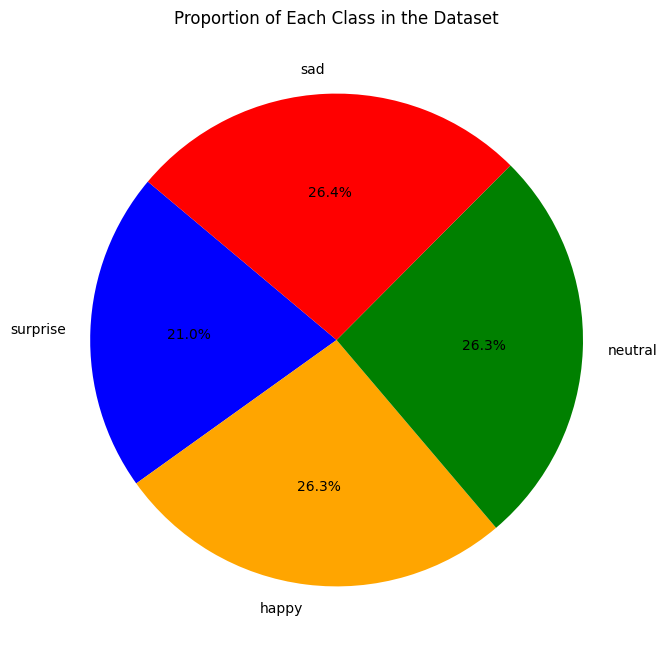

In [ ]:
import matplotlib.pyplot as plt

# Data
classes = ['surprise', 'happy', 'neutral', 'sad']
num_images = [3173, 3976, 3978, 3982]

%matplotlib inline

plt.figure(figsize=(10, 6))
plt.bar(classes, num_images, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Training Images per Class')
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(num_images, labels=classes, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Proportion of Each Class in the Dataset')
plt.show()



In [ ]:
# Check the Data Set for imbalance
min_class_size = min(num_images)
max_class_size = max(num_images)
imbalance_ratio = max_class_size / min_class_size

print(f"Imbalance Ratio (Max Class Size / Min Class Size): {imbalance_ratio:.2f}")


Imbalance Ratio (Max Class Size / Min Class Size): 1.25


In the initial EDA of the dataset, the categories of emotions appeared to be balanced except for 'surprise'. Digging into the statistical significance of the disparity, I have concluded the following

An imbalance ratio of 1.25 (Max Class Size / Min Class Size) suggests a relatively mild imbalance among the classes in the dataset.

**Impact of Mild Imbalance**
Model Performance: **Model Performance** Modern neural networks, particularly those used for image classification tasks (like CNNs), are quite robust to mild class imbalances. An imbalance ratio close to 1 indicates that the classes are fairly well represented.

**Learning Dynamics**: The slight imbalance might not significantly skew the learning process, meaning the model can still learn to generalize well across all classes without heavy reliance on data balancing techniques.

To make sure that the mild inbalance is not going to impact the training process the following steps have been employed in the following models traing.
** Monitor Class-specific Metrics: **Even with a mild imbalance,** monitoring metrics like precision, recall, and F1-score** for each class is good practice. This ensures that all classes are correctly learned by the model, and no class is systematically favored or ignored.

**Mild Data Augmentation:** While aggressive oversampling or synthetic data generation might not be necessary, employing data augmentation techniques  rotation, flipping, scaling on the training set, can further help handle the slight imbalance's impact.

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [83]:
from keras.preprocessing.image import ImageDataGenerator

# Define image size and paths
picture_size = 48
base_path = "Facial_emotion_images/"

train_path = base_path + "train/"
validation_path = base_path + "validation/"
test_path = base_path + "test/"

# Initialize the data generator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale= 0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test sets, usually only rescaling is applied
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [84]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order for evaluation
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [85]:
# Define the image size and paths
image_size = 48
train_path = "Facial_emotion_images/train"
test_path = "Facial_emotion_images/test"
validation_path = "Facial_emotion_images/validation"

# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Prepare the data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,  # Keep the same batch size for simplicity
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    shuffle=False)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

### **Creating the Base Neural Network**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

In [18]:
import tensorflow as tf

In [86]:
# Fixing the random seed generator to ensure random initilization numbers
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


cnn_model_1 = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    # Fourth Convolutional Block
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    (Flatten()),
    # Dense Layers
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(4, activation='softmax')
])


cnn_model_1.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_37 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_69 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_59 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_70 (Conv2D)          (None, 24, 24, 128)     

### **Compiling and Training the Model**

In [89]:
cnn_model_1.compile(optimizer=AdamW(learning_rate=0.0005),  # Adjust learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0002)


In [90]:
history = cnn_model_1.fit(
    train_generator,
    epochs=25,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/25
473/473 [==============================] - 23s 37ms/step - loss: 1.3107 - accuracy: 0.3486 - val_loss: 1.3613 - val_accuracy: 0.3466 - lr: 5.0000e-04
Epoch 2/25
473/473 [==============================] - 17s 37ms/step - loss: 1.0506 - accuracy: 0.5281 - val_loss: 1.0203 - val_accuracy: 0.5642 - lr: 5.0000e-04
Epoch 3/25
473/473 [==============================] - 17s 37ms/step - loss: 0.9095 - accuracy: 0.6008 - val_loss: 0.8793 - val_accuracy: 0.6082 - lr: 5.0000e-04
Epoch 4/25
473/473 [==============================] - 17s 37ms/step - loss: 0.8377 - accuracy: 0.6415 - val_loss: 0.8337 - val_accuracy: 0.6335 - lr: 5.0000e-04
Epoch 5/25
473/473 [==============================] - 17s 37ms/step - loss: 0.7888 - accuracy: 0.6726 - val_loss: 0.7163 - val_accuracy: 0.7133 - lr: 5.0000e-04
Epoch 6/25
473/473 [==============================] - 18s 37ms/step - loss: 0.7447 - accuracy: 0.6975 - val_loss: 0.7991 - val_accuracy: 0.6819 - lr: 5.0000e-04
Epoch 7/25
473/473 [==============

In [92]:
# prompt: save the model in .h5 format

cnn_model_1.save('cnn_model_1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [93]:

!tensorflowjs_converter --input_format=keras /content/cnn_model_1.h5 /content/cnn_model_1_js


2024-02-16 18:56:22.213900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 18:56:22.213951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 18:56:22.215253: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 18:56:23.185885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


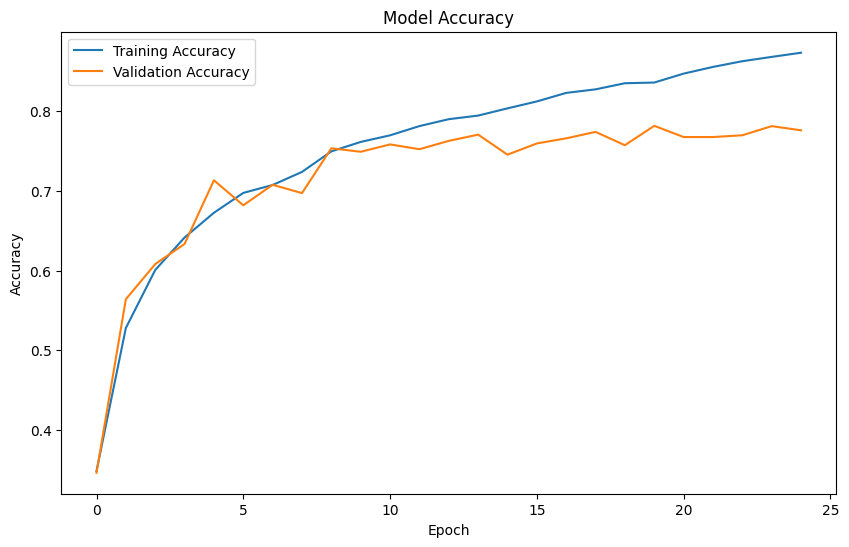

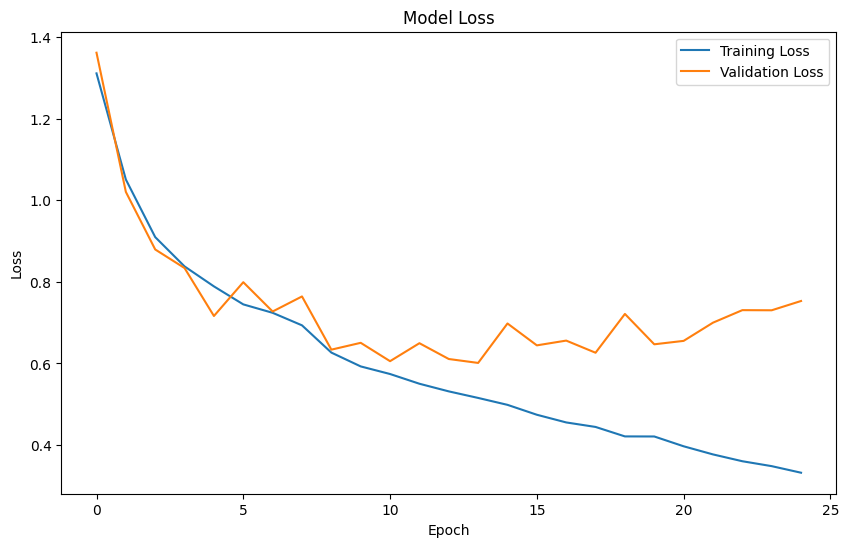

In [97]:
# prompt: plot the performance for cnn_model_1

# Plot the performance of cnn_model_1
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [98]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

4/4 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.77      0.72      0.74        32
           2       0.71      0.84      0.77        32
           3       0.93      0.84      0.89        32

    accuracy                           0.81       128
   macro avg       0.82      0.81      0.81       128
weighted avg       0.82      0.81      0.81       128



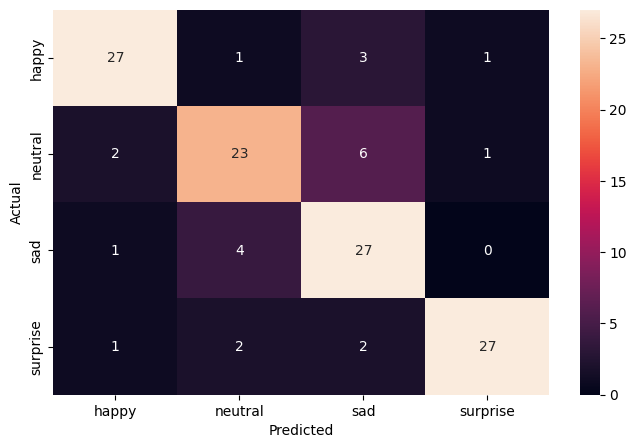

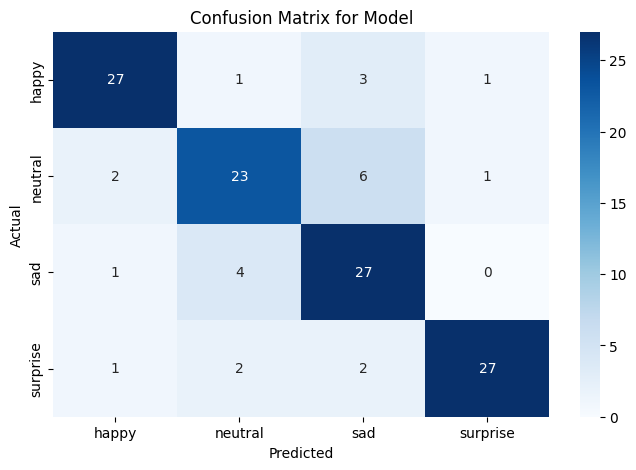

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(model.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=class_names_list, yticklabels=class_names_list)

# Add labels and title
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Model")

# Show the plot
plt.show()

### **Creating the second Convolutional Neural Network**

In [42]:
# Fixing the random seed generator to ensure random initilization numbers
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])


### **Compiling and Training the Model**

In [55]:
model_2.compile(optimizer=AdamW(learning_rate=0.0005),  # Adjust learning rate as needed
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='accuracy', patience=5, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.0002)


In [56]:
history = model_2.fit(
    train_generator,
    epochs=20,  # Adjust based on early stopping
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
473/473 [==============================] - 10s 16ms/step - loss: 1.3078 - accuracy: 0.3489 - val_loss: 1.2480 - val_accuracy: 0.4475 - lr: 5.0000e-04
Epoch 2/20
473/473 [==============================] - 8s 16ms/step - loss: 1.1257 - accuracy: 0.4907 - val_loss: 1.0414 - val_accuracy: 0.5568 - lr: 5.0000e-04
Epoch 3/20
473/473 [==============================] - 8s 16ms/step - loss: 1.0172 - accuracy: 0.5634 - val_loss: 1.0594 - val_accuracy: 0.5310 - lr: 5.0000e-04
Epoch 4/20
473/473 [==============================] - 8s 16ms/step - loss: 0.9535 - accuracy: 0.5899 - val_loss: 0.9601 - val_accuracy: 0.5998 - lr: 5.0000e-04
Epoch 5/20
473/473 [==============================] - 8s 16ms/step - loss: 0.9031 - accuracy: 0.6179 - val_loss: 0.9044 - val_accuracy: 0.6229 - lr: 5.0000e-04
Epoch 6/20
473/473 [==============================] - 8s 16ms/step - loss: 0.8512 - accuracy: 0.6458 - val_loss: 0.8131 - val_accuracy: 0.6626 - lr: 5.0000e-04
Epoch 7/20
473/473 [===================

In [67]:
# prompt: save the model in .h5 format

model_2.save('model_2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [59]:
import tensorflow as tf
import datetime

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
dataset = datagen.flow_from_directory(
    folder_path + "train",
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)
X, y = dataset.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape, y.shape)


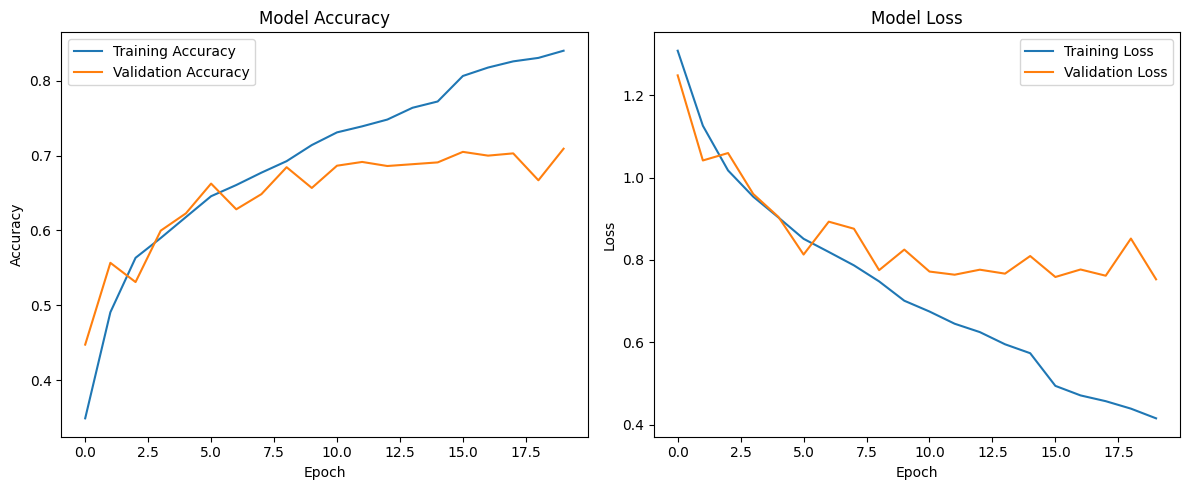

In [60]:
import matplotlib.pyplot as plt

def plot_model_performance(history):
    # Accuracy plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

#
plot_model_performance(history)


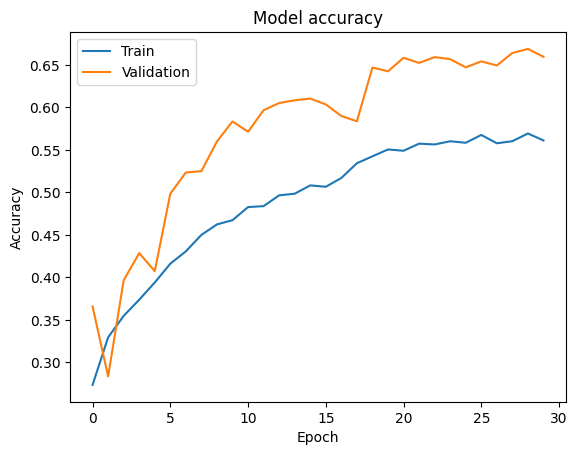

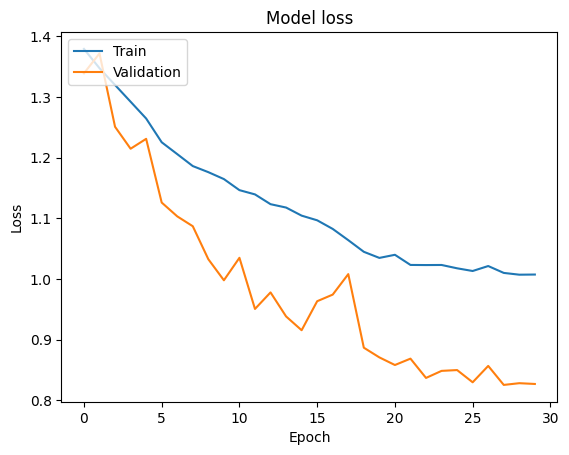

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### **Evaluating the Model on the Test Set**

In [ ]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()


4/4 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.68      0.66      0.67        32
           1       0.60      0.56      0.58        32
           2       0.50      0.62      0.56        32
           3       0.96      0.81      0.88        32

    accuracy                           0.66       128
   macro avg       0.69      0.66      0.67       128
weighted avg       0.69      0.66      0.67       128



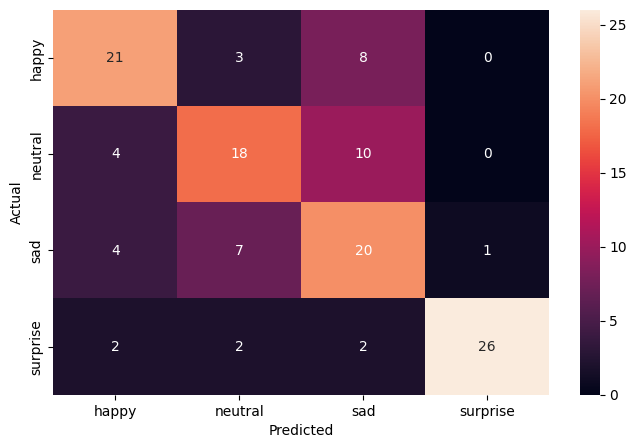

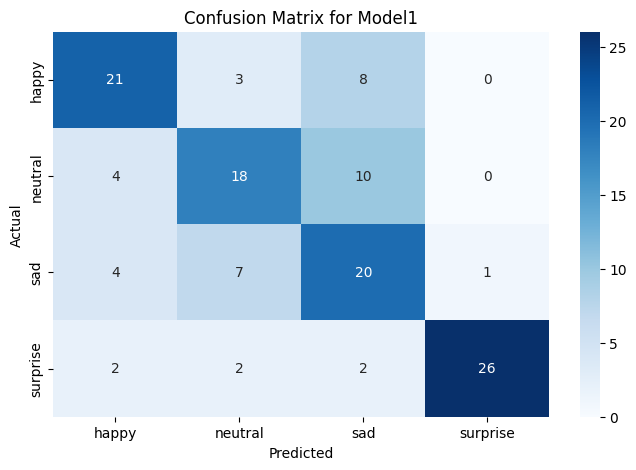

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(model1.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=class_names_list, yticklabels=class_names_list)

# Add labels and title
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Model1")

# Show the plot
plt.show()

1/1 [==============================] - 0s 49ms/step


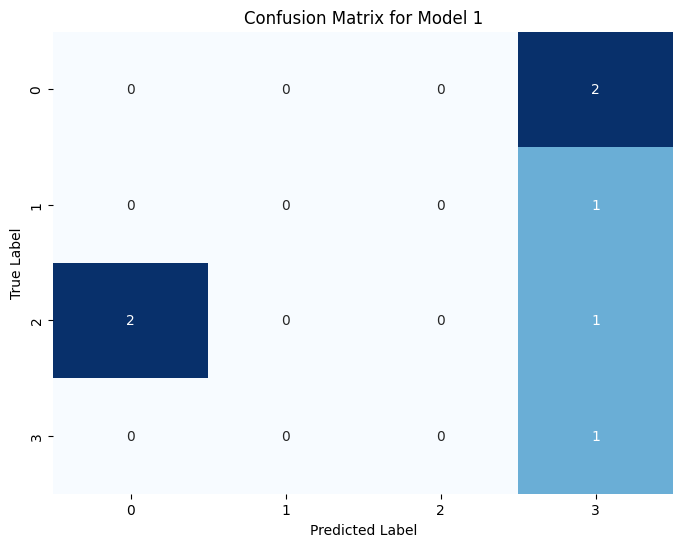

In [ ]:
# Predictions for the test set
y_pred = model1.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Model 1")
plt.show()


**Observations and Insights:__**

In [ ]:
# Fixing the random seed generator to ensure random initilization numbers for weights
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

- Try out a slightly larger architecture

In [ ]:
cnn_model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Increase dropout rate
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Consistent dropout after pooling
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Higher dropout before the final layer
    Dense(4, activation='softmax')
])


In [ ]:
cnn_model_3.compile(optimizer=Adam(learning_rate=0.001),  #
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001)  # Adjusted patience


In [ ]:
history = cnn_model_3.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    batch_size=16
)


Epoch 1/50
473/473 [==============================] - 21s 42ms/step - loss: 1.3612 - accuracy: 0.3032 - val_loss: 1.3333 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 2/50
473/473 [==============================] - 20s 42ms/step - loss: 1.3351 - accuracy: 0.3375 - val_loss: 1.2801 - val_accuracy: 0.4004 - lr: 0.0010
Epoch 3/50
473/473 [==============================] - 20s 42ms/step - loss: 1.3106 - accuracy: 0.3587 - val_loss: 1.2701 - val_accuracy: 0.3824 - lr: 0.0010
Epoch 4/50
473/473 [==============================] - 20s 42ms/step - loss: 1.2907 - accuracy: 0.3750 - val_loss: 1.2072 - val_accuracy: 0.4354 - lr: 0.0010
Epoch 5/50
473/473 [==============================] - 20s 42ms/step - loss: 1.2730 - accuracy: 0.3894 - val_loss: 1.1763 - val_accuracy: 0.4824 - lr: 0.0010
Epoch 6/50
473/473 [==============================] - 20s 42ms/step - loss: 1.2554 - accuracy: 0.4039 - val_loss: 1.1635 - val_accuracy: 0.4876 - lr: 0.0010
Epoch 7/50
473/473 [==============================] - 20s 

In [ ]:
cnn_model_3.save('cnn_model_2.h5')


NameError: name 'cnn_model_2' is not defined

### **Evaluating the Model on the Test Set**

4/4 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.53      0.66      0.58        32
           2       0.57      0.53      0.55        32
           3       0.96      0.84      0.90        32

    accuracy                           0.70       128
   macro avg       0.72      0.70      0.71       128
weighted avg       0.72      0.70      0.71       128



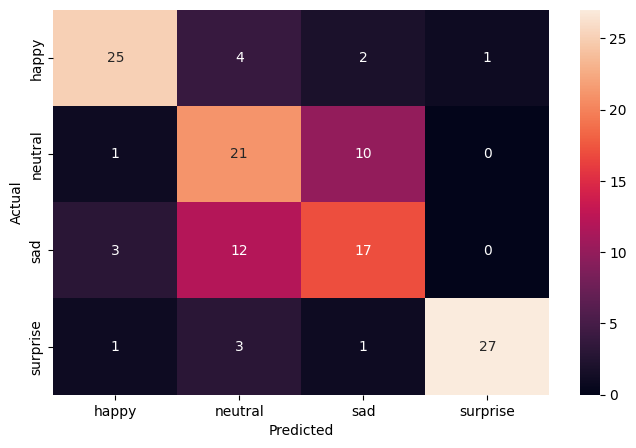

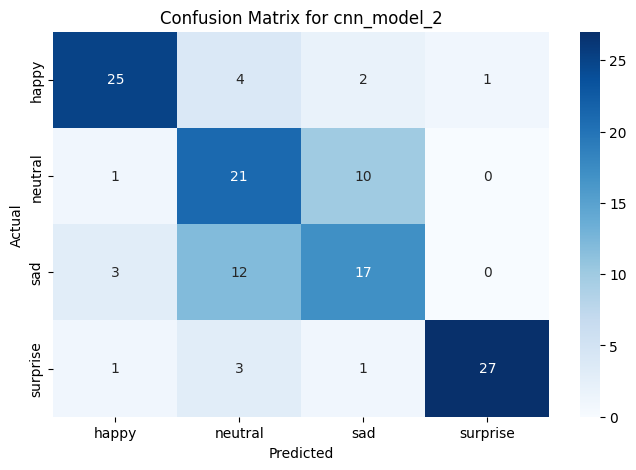

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
predicted_labels = np.argmax(cnn_model_2.predict(test_generator), axis=1)

# Get the true labels for the test set
true_labels = test_generator.classes

# Get the class names
class_names_list = test_generator.class_indices.keys()

# Calculate and display the metrics
metrics_score(true_labels, predicted_labels)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", xticklabels=class_names_list, yticklabels=class_names_list)

# Add labels and title
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for cnn_model_2")

# Show the plot
plt.show()

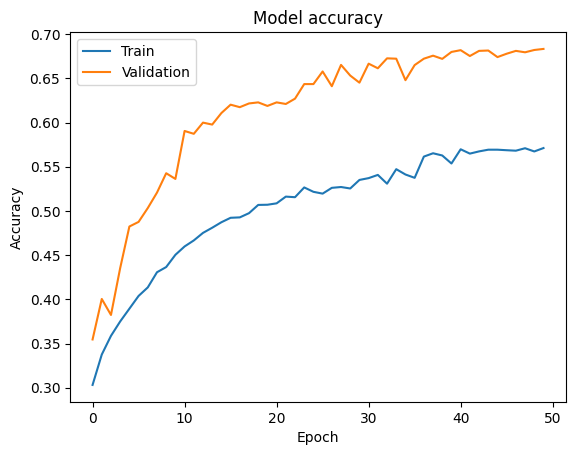

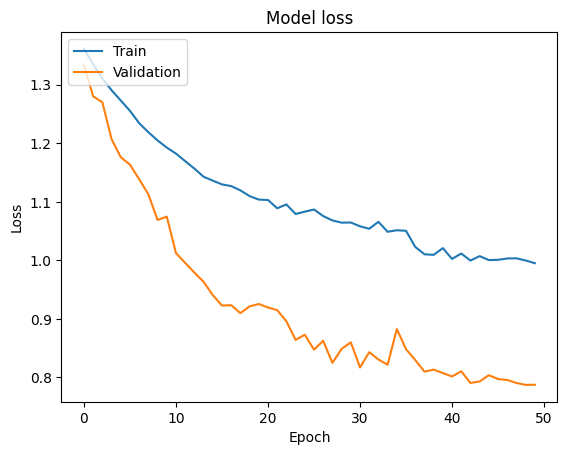

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.53      0.66      0.58        32
           2       0.57      0.53      0.55        32
           3       0.96      0.84      0.90        32

    accuracy                           0.70       128
   macro avg       0.72      0.70      0.71       128
weighted avg       0.72      0.70      0.71       128

None


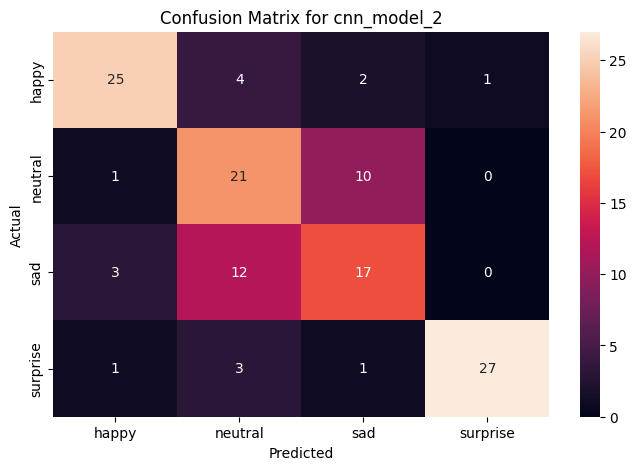

In [ ]:
def metrics_score(actual, predicted):

    from sklearn.metrics import classification_report

    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = class_names_list, yticklabels = class_names_list)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.title('Confusion Matrix for cnn_model_2')

print(metrics_score(true_labels, predicted_labels))

ADDITIONAL

**Observations and Insights:__**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

## **VGG16 Model**

In [91]:
# Set the random seed
np.random.seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    brightness_range=(0., 2.),
    shear_range=0.3
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep data in order for evaluation
)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Importing the VGG16 Architecture**

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()
for layer in vgg.layers:
    layer.trainable = False
x = vgg.output
    Dropout for (x) in regularization

 # First Convolutional Block
x = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 3)),
x = BatchNormalization(),
x = Conv2D(64, (3, 3), activation='relu', padding='same'),
x = MaxPooling2D((2, 2)),
x = Dropout(0.25(x)),

x = # Second Convolutional Block
x = Conv2D(128, (3, 3), activation='relu', padding='same'),
x = BatchNormalization(),
x = Conv2D(128, (3, 3), activation='relu', padding='same'),
x = MaxPooling2D((2, 2)),
x = Dropout(0.5)(x),

x = # Third Convolutional Block
x = Conv2D(256, (3, 3), activation='relu', padding='same'),
x = BatchNormalization(),
x = Conv2D(256, (3, 3), activation='relu', padding='same'),
x = BatchNormalization(),
x = Conv2D(256, (3, 3), activation='relu', padding='same'),
x = MaxPooling2D((2, 2)),
x = Dropout(0.5)(x),

x = # Fourth Convolutional Block
x = Conv2D(512, (3, 3), activation='relu', padding='same'),
x = BatchNormalization(),
x = Conv2D(512, (3, 3), activation='relu', padding='same'),
x = GlobalAveragePooling2D(),
x = Dropout(0.5)(x),
x = (Flatten()),
 # Dense Layers
x = Dense(512, activation='relu'),
x = Dense(256, activation='relu'),
x = Dense(128, activation='relu'),
x = Dropout(0.5)(x),
x = Dense(64, activation='relu'),
x = Dropout(0.25(x)),
predictions = Dense(4, activation='softmax')(x)  # Final layer with softmax activation for classification

model = Model(inputs=vgg.input, outputs=predictions)


model.summary()

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### **Compiling and Training the VGG16 Model**

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Assuming 'train_directory' is the path to your training data
train_generator = train_datagen.flow_from_directory(
    'Facial_emotion_images/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator,
                    epochs=20,  # Adjust based on your dataset size and early stopping
                    steps_per_epoch=train_generator.n // train_generator.batch_size,
                    validation_data=validation_generator,  # Make sure you have a validation generator
                    validation_steps=validation_generator.n // validation_generator.batch_size)


Epoch 1/20
472/472 [==============================] - 25s 43ms/step - loss: 8.7853 - accuracy: 0.3355 - val_loss: 1.3329 - val_accuracy: 0.3204
Epoch 2/20
472/472 [==============================] - 20s 43ms/step - loss: 5.1111 - accuracy: 0.3729 - val_loss: 1.3463 - val_accuracy: 0.3095
Epoch 3/20
472/472 [==============================] - 20s 42ms/step - loss: 3.2081 - accuracy: 0.3913 - val_loss: 1.3588 - val_accuracy: 0.2808
Epoch 4/20
472/472 [==============================] - 20s 42ms/step - loss: 2.3203 - accuracy: 0.3915 - val_loss: 1.3643 - val_accuracy: 0.2617
Epoch 5/20
472/472 [==============================] - 20s 42ms/step - loss: 1.8286 - accuracy: 0.4000 - val_loss: 1.3658 - val_accuracy: 0.2573
Epoch 6/20
472/472 [==============================] - 20s 42ms/step - loss: 1.5793 - accuracy: 0.4072 - val_loss: 1.3693 - val_accuracy: 0.2534
Epoch 7/20
472/472 [==============================] - 20s 42ms/step - loss: 1.4558 - accuracy: 0.4134 - val_loss: 1.3710 - val_accuracy:

In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
vggmodel = Sequential()

#
transfer_layer = vgg.get_layer('block3_pool')
vgg.trainable = False  # Ensure VGG16 weights are not updated during training

# Flatten the output from the transfer layer
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation='relu')(x)

# Adding a Dropout layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)

# Adding a Batch Normalization layer
x = BatchNormalization()(x)
# Add a Dense Layer with 128 neurons
x = Dense(128, activation='relu')(x)  # Fill in the missing part

# Add a Dropout layer with a dropout ratio of 0.3
x = Dropout(0.3)(x)  # Fill in the missing part

# Add a Dense Layer with 64 neurons
x = Dense(64, activation='relu')(x)  # Fill in the missing part

# Add a Batch Normalization layer
x = BatchNormalization()(x)  # Fill in the missing part

# Adding the final dense layer with 4 neurons for the classification
pred = Dense(4, activation='softmax')(x)

# Initializing the model with VGG16 input and the final dense layer as output
vggmodel = Model(inputs=vgg.input, outputs=pred)

# Printing the summary of the model
vggmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [ ]:
vggmodel.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./vggmodel.h5", monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
vggmodel.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])



In [ ]:
history = vggmodel.fit(
    train_generator,
    epochs=15,  # Number of epochs to train for
    validation_data=validation_generator
)

Epoch 1/15
473/473 [==============================] - 24s 43ms/step - loss: 1.3795 - accuracy: 0.3710 - val_loss: 1.5411 - val_accuracy: 0.2443
Epoch 2/15
473/473 [==============================] - 20s 42ms/step - loss: 1.2118 - accuracy: 0.4430 - val_loss: 1.5329 - val_accuracy: 0.2443
Epoch 3/15
473/473 [==============================] - 20s 42ms/step - loss: 1.1582 - accuracy: 0.4800 - val_loss: 1.4474 - val_accuracy: 0.2447
Epoch 4/15
473/473 [==============================] - 20s 42ms/step - loss: 1.1218 - accuracy: 0.5016 - val_loss: 1.5014 - val_accuracy: 0.2449
Epoch 5/15
473/473 [==============================] - 20s 42ms/step - loss: 1.0910 - accuracy: 0.5237 - val_loss: 1.4483 - val_accuracy: 0.2291
Epoch 6/15
473/473 [==============================] - 20s 42ms/step - loss: 1.1074 - accuracy: 0.5073 - val_loss: 1.4074 - val_accuracy: 0.2439
Epoch 7/15
473/473 [==============================] - 20s 42ms/step - loss: 1.0872 - accuracy: 0.5293 - val_loss: 1.4513 - val_accuracy:

### **Evaluating the VGG16 model**

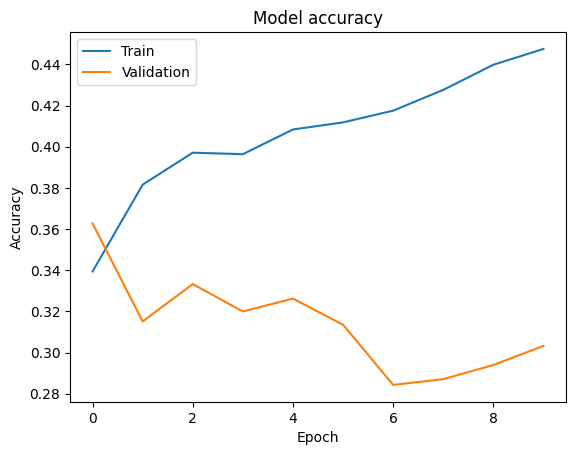

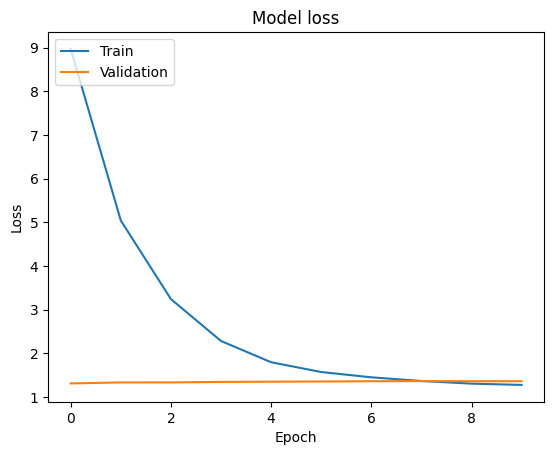

1/1 [==============================] - 0s 356ms/step


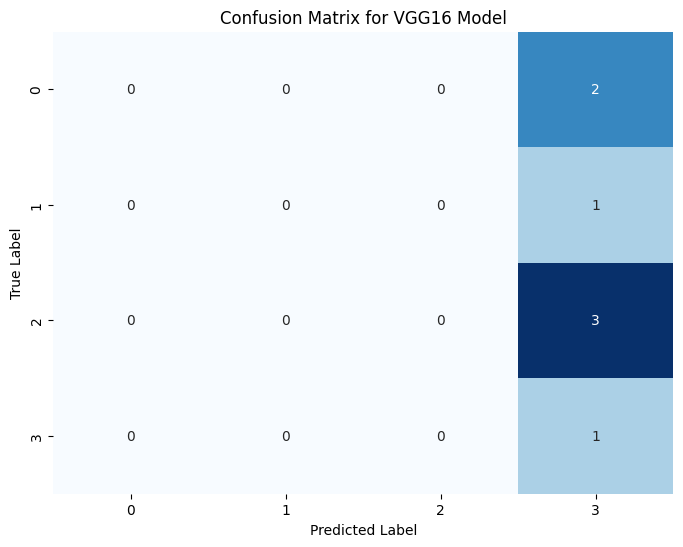

In [ ]:
# Plot the training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Get predictions for the test set
y_pred = vggmodel.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG16 Model")
plt.show()


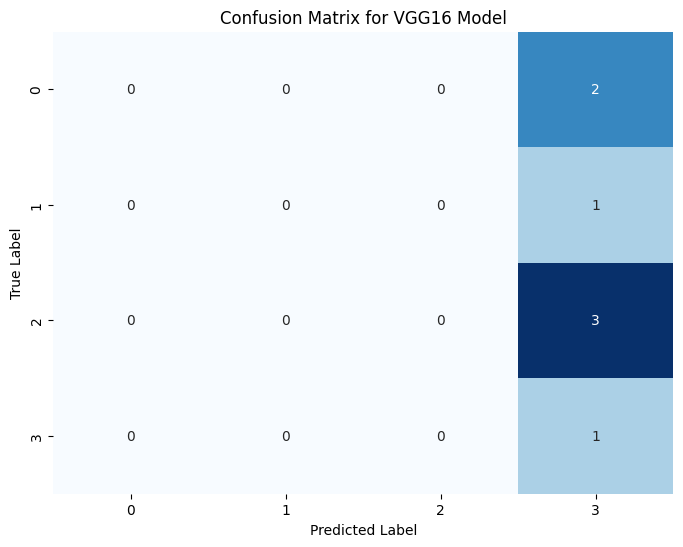

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for VGG16 Model")
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# Set the random Seed
np.random.seed(42)

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48, 48, 3))
Resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_31 (InputLayer)       [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_31[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                      

### **Compiling and Training the Model**

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Convert features to vectors
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)  # Assuming 4 classes

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'Facial_emotion_images/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    'Facial_emotion_images/validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001),
    ModelCheckpoint('resnet_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks)


Epoch 1/30
473/473 [==============================] - ETA: 0s - loss: 8.6572 - accuracy: 0.3372
Epoch 1: val_accuracy improved from -inf to 0.46675, saving model to resnet_model.h5
473/473 [==============================] - 22s 44ms/step - loss: 8.6572 - accuracy: 0.3372 - val_loss: 3.0467 - val_accuracy: 0.4667 - lr: 1.0000e-04
Epoch 2/30
  1/473 [..............................] - ETA: 27s - loss: 4.7388 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


472/473 [============================>.] - ETA: 0s - loss: 4.8461 - accuracy: 0.3785
Epoch 2: val_accuracy improved from 0.46675 to 0.48202, saving model to resnet_model.h5
473/473 [==============================] - 20s 43ms/step - loss: 4.8436 - accuracy: 0.3785 - val_loss: 2.2018 - val_accuracy: 0.4820 - lr: 1.0000e-04
Epoch 3/30
473/473 [==============================] - ETA: 0s - loss: 3.1957 - accuracy: 0.3913
Epoch 3: val_accuracy did not improve from 0.48202
473/473 [==============================] - 21s 45ms/step - loss: 3.1957 - accuracy: 0.3913 - val_loss: 1.7707 - val_accuracy: 0.4732 - lr: 1.0000e-04
Epoch 4/30
472/473 [============================>.] - ETA: 0s - loss: 2.2651 - accuracy: 0.3897
Epoch 4: val_accuracy did not improve from 0.48202
473/473 [==============================] - 21s 44ms/step - loss: 2.2636 - accuracy: 0.3898 - val_loss: 1.4476 - val_accuracy: 0.4754 - lr: 1.0000e-04
Epoch 5/30
473/473 [==============================] - ETA: 0s - loss: 1.7918 - accu

### **Evaluating the ResNet Model**

1/1 [==============================] - 0s 20ms/step


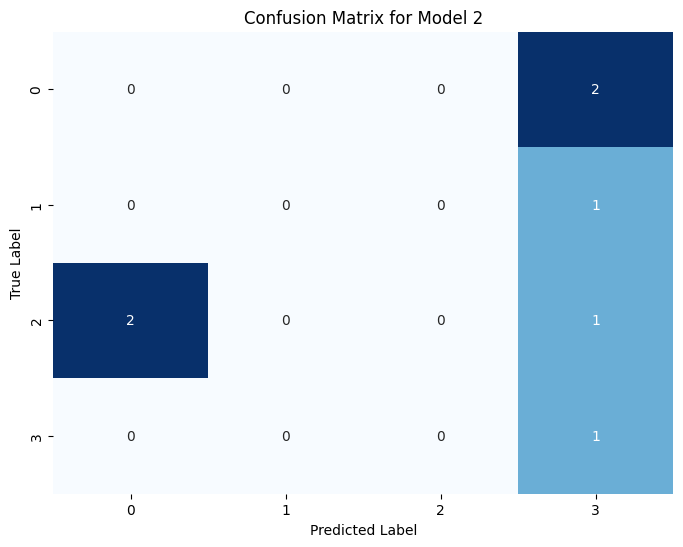

In [ ]:
# Get predictions for the test set
y_pred = model1.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Model 2")
plt.show()


**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_32 (InputLayer)       [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling_8 (Rescaling)     (None, 48, 48, 3)            0         ['input_32[0][0]']            
                                                                                                  
 normalization_5 (Normaliza  (None, 48, 48, 3)            0         ['rescaling_8[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv (Conv2D)          (None, 24, 24, 32)           864       ['normalizatio

### **Compiling and Training the Model**

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=0.00001),
    ModelCheckpoint('efficientnet_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

history = model.fit(
    train_generator,
    epochs=30,  # Adjust epochs based on early stopping
    validation_data=validation_generator,
    callbacks=callbacks)


Epoch 1/30
472/473 [============================>.] - ETA: 0s - loss: 9.1557 - accuracy: 0.3363
Epoch 1: val_accuracy improved from -inf to 0.42274, saving model to efficientnet_model.h5
473/473 [==============================] - 22s 43ms/step - loss: 9.1448 - accuracy: 0.3366 - val_loss: 3.5252 - val_accuracy: 0.4227 - lr: 1.0000e-04
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


473/473 [==============================] - ETA: 0s - loss: 5.1750 - accuracy: 0.3830
Epoch 2: val_accuracy improved from 0.42274 to 0.47599, saving model to efficientnet_model.h5
473/473 [==============================] - 20s 43ms/step - loss: 5.1750 - accuracy: 0.3830 - val_loss: 2.3004 - val_accuracy: 0.4760 - lr: 1.0000e-04
Epoch 3/30
472/473 [============================>.] - ETA: 0s - loss: 3.4058 - accuracy: 0.3885
Epoch 3: val_accuracy improved from 0.47599 to 0.48925, saving model to efficientnet_model.h5
473/473 [==============================] - 20s 43ms/step - loss: 3.4051 - accuracy: 0.3884 - val_loss: 1.7713 - val_accuracy: 0.4893 - lr: 1.0000e-04
Epoch 4/30
472/473 [============================>.] - ETA: 0s - loss: 2.3445 - accuracy: 0.3953
Epoch 4: val_accuracy did not improve from 0.48925
473/473 [==============================] - 20s 42ms/step - loss: 2.3446 - accuracy: 0.3951 - val_loss: 1.5129 - val_accuracy: 0.4812 - lr: 1.0000e-04
Epoch 5/30
473/473 [==============

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'Facial_emotion_images/train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    'Facial_emotion_images/validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


### **Evaluating the EfficientnetNet Model**

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

In [ ]:
# Setting a Random Seed
np.random.seed(42)

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_set = datagen_train.flow_from_directory(
    folder_path + "train",
    target_size=(48, 48),
    color_mode='rgb',  # Adjusted from 'grayscale' to 'rgb'
    batch_size=batch_size,
    class_mode='categorical',
    classes=['happy', 'sad', 'neutral', 'surprise'],
    shuffle=True)



validation_generator = validation_datagen.flow_from_directory(
    'Facial_emotion_images/validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model3 = Sequential()

# Add 1st CNN Block
model3.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(48, 48, 3)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Add 2nd CNN Block
model3.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

# Add 3rd CNN Block
model3.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model3.add(Conv2D(256, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

# First fully connected layer
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))

# Second fully connected layer
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(4, activation='softmax'))


### **Compiling and Training the Model**

In [ ]:
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Assuming `epochs` and `steps_per_epoch` are defined based on your dataset size
history3 = model3.fit(
    train_set,
    steps_per_epoch=train_set.samples // 32,
    epochs=epochs,
    validation_data=validation_set,
    validation_steps=validation_set.samples // 32)


Epoch 1/10
472/472 [==============================] - 25s 47ms/step - loss: 1.4600 - accuracy: 0.3279 - val_loss: 1.3566 - val_accuracy: 0.3663
Epoch 2/10
472/472 [==============================] - 22s 47ms/step - loss: 1.2703 - accuracy: 0.3913 - val_loss: 1.3540 - val_accuracy: 0.3669
Epoch 3/10
472/472 [==============================] - 23s 48ms/step - loss: 1.2252 - accuracy: 0.4277 - val_loss: 1.3810 - val_accuracy: 0.2284
Epoch 4/10
472/472 [==============================] - 23s 48ms/step - loss: 1.1843 - accuracy: 0.4611 - val_loss: 1.3748 - val_accuracy: 0.2440
Epoch 5/10
472/472 [==============================] - 23s 48ms/step - loss: 1.1491 - accuracy: 0.4806 - val_loss: 1.3550 - val_accuracy: 0.3665
Epoch 6/10
472/472 [==============================] - 23s 48ms/step - loss: 1.1276 - accuracy: 0.4933 - val_loss: 1.3667 - val_accuracy: 0.2290
Epoch 7/10
472/472 [==============================] - 23s 48ms/step - loss: 1.1270 - accuracy: 0.4878 - val_loss: 1.3796 - val_accuracy:

### **Evaluating the Model on Test Set**

In [ ]:
#Plotting the model performance

def plot_model_performance(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.show()

## plot_model_performance(history)


**Observations and Insights:__**

### **Plotting the Confusion Matrix for the chosen final model**

**Observations and Insights:__**

## **Conclusion:____________**

The goal was more nuanced then simply identifying a person in an image we aimed to detect the emotional state as well.
Convolutional Neural NEtworks have definitly proven to be the correct tool.



Accuracy vs. Overfitting:

In pursuit of optimal performance, we tread the fine line between high accuracy and the specter of overfitting. The goal is to achieve a model that not only performs well on known data but also retains its discernment when faced with new, unseen images. This balance ensures that our model genuinely understands the emotional cues, rather than memorizing specific training example

 Transfer Learning:
The strategy of employing transfer learning, wherein we utilize models pre-trained on extensive, diverse datasets, has substantially accelerated our progress. These models come with a foundational understanding of visual data, which we then fine-tune to our specific task of emotion recognition. This approach has yielded significant gains, enabling us to build upon a rich, pre-existing knowledge base without the prohibitive costs of training from scratch.

In conclusion, after many different itterations of models, there is no one size fits all great option for what model setup to use. The tool needs to fit the job at hand and depending on a large amount of variables, data sets, hyperparameters, and even limitations like time and resources. Some hand crafting of the CNN model will be required to properly approach solving a task.

With our task i will note that when i put in a 5th convolutional layer in the final CNNN i had to remove it as the feature space has been over reduced to the point that it no longer could be compiled.



Thank you: -Robert A, Sloan

### **Insights**

### **Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

### **Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [ ]:
# prompt: export to html using nbconvert

!jupyter nbconvert --to html /content/RobertSloanMilestoneSubmission.ipynb


[NbConvertApp] Converting notebook /content/RobertSloanMilestoneSubmission.ipynb to html
[NbConvertApp] Writing 2234189 bytes to /content/RobertSloanMilestoneSubmission.html
